## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
from pprint import pprint

# Add local `core` module to path
sys.path.insert(0, '../../')

import gym

from core.learn.qlearning.agents import EpsilonGreedyAgent
from core.learn.qlearning.models import DeepQNetwork
from core.wrappers.epsilon import EpsilonWrapper
from core.run import run_experiment

In [2]:
def get_model_agent():
    """ Return an untrained model and agent.  """

    # Use a small mlp network (default: mlp_value_n_hidden=(32, 32, 64), mlp_value_activation_f='tanh')
    model = DeepQNetwork(
            input_shape=env.observation_space.shape,
            output_shape=env.action_space.n,
            learning_rate=0.00025,
            gamma=0.95,
            use_cnn=False,
            mlp_n_hidden=(),
            mlp_value_n_hidden=(32, 32, 64),
            mlp_value_activation_f='tanh',
    )

    # Agent for the training process
    agent = EpsilonGreedyAgent(
            env=env,
            model=model,
            gamma=0.95,  # discount of future rewards
            batch_size=32,
            replay_capacity=5000,
            training_start=100,  # start training after x number of steps
            training_interval=1,  # train every x steps
            use_epsilon=True,
            save_folder=os.path.join('models', env.spec.id),
            save_best=True,
            save_interval=200,
    )
    
    return model, agent

## CartPole

#### Settings

In [3]:
env = gym.make('CartPole-v0')

# Apply epsilon wrapper for exploration.
env = EpsilonWrapper(
        env,
        epsilon_start=1.0,
        epsilon_end=0.02,
        epsilon_decay=1e-4
)

model, agent = get_model_agent()

#### Experiments

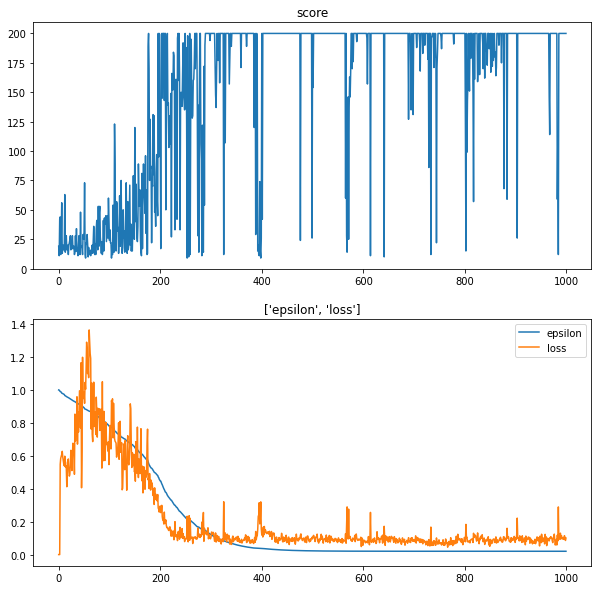

In [4]:
history = run_experiment(
    env, 
    agent, 
    runs=1000, 
    plot_stats=['score', ['epsilon', 'loss']], 
    plot_period=50,
    ipython=True,  # If False in .ipynb, there will be no updates.
)

### Saving and loading

In [5]:
agent.save_model(os.path.join('models', env.spec.id))
del model, agent

In [6]:
# Load new network and agent
model, agent = get_model_agent()
agent.load_model(os.path.join('models', env.spec.id))

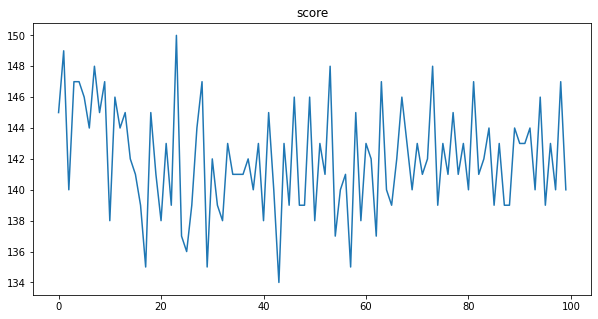

In [7]:
history = run_experiment(
    env, 
    agent, 
    runs=100, 
    plot_stats=['score'], 
    plot_period=50,
    train=False,
    ipython=True,  # If False in .ipynb, there will be no visible updates.
)

In [8]:
# Possible plot stats.
pprint(list(history.keys()))

['score',
 'steps_per_game',
 'framerate',
 'runs',
 'return',
 'epsilon',
 'loss',
 'total_episodes',
 'total_steps']
